In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
file_path = "C:/Users/sridh/Downloads/archive/data.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')  # or encoding='utf-8' or encoding='ISO-8859-1'


In [20]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [25]:
df.describe().round()

,Quantity,UnitPrice,CustomerID
count,541909.0,541909.0,406829.0
mean,10.0,5.0,15288.0
std,218.0,97.0,1714.0
min,-80995.0,-11062.0,12346.0
25%,1.0,1.0,13953.0
50%,3.0,2.0,15152.0
75%,10.0,4.0,16791.0
max,80995.0,38970.0,18287.0


In [28]:
columns=list(df.columns)
columns

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

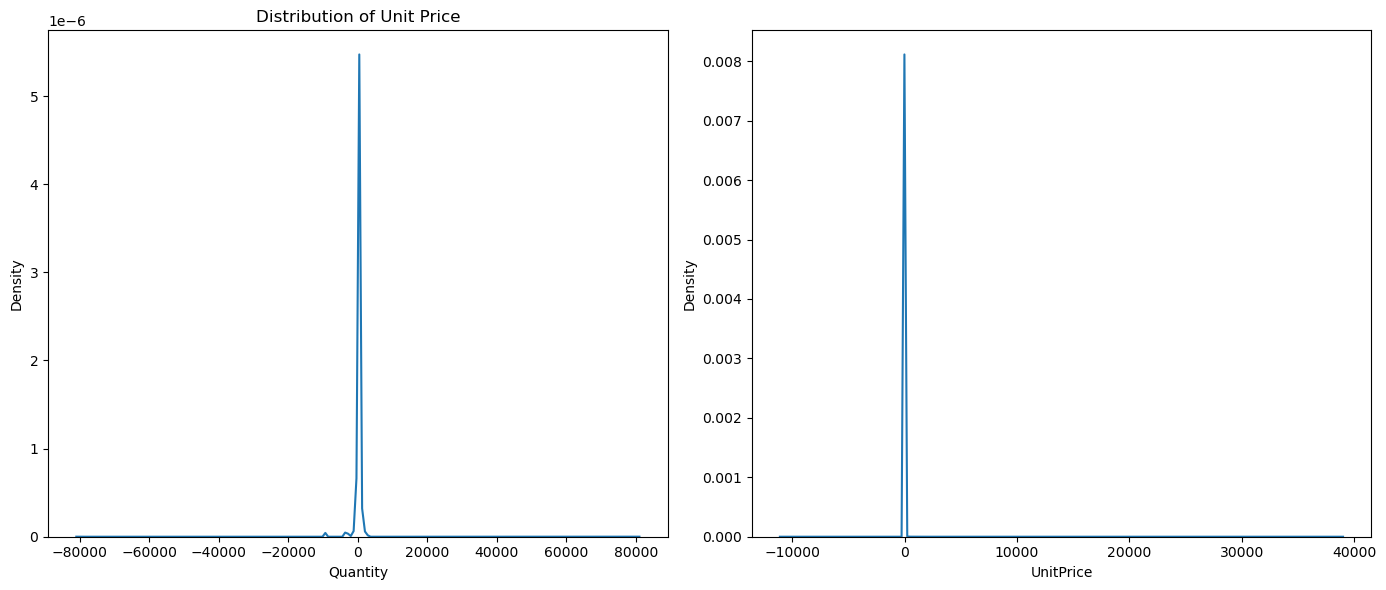

In [34]:
fig, axes = plt.subplots(1,2, figsize=(14,6))

sns.kdeplot(data=df, x='Quantity', ax=axes[0])
axes[0].set_title('Distribution of Quantity')

sns.kdeplot(data=df, x='UnitPrice', ax=axes[1])
axes[0].set_title('Distribution of Unit Price')

plt.tight_layout()

In [35]:
df.duplicated().sum()

5268

In [40]:
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [41]:
df[['Description','CustomerID']].nunique()

Description    4223
CustomerID     4372
dtype: int64

In [39]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print(f"First invoice recorded on: {df['InvoiceDate'].min()}")
print(f"Last invoice recorded on: {df['InvoiceDate'].max()}")

First invoice recorded on: 2010-12-01 08:26:00
Last invoice recorded on: 2011-12-09 12:50:00


In [42]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [43]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [44]:
df_filtered = df[['InvoiceDate', 'CustomerID', 'Quantity', 'UnitPrice']].copy()

In [45]:
df_filtered.isnull().sum()

InvoiceDate         0
CustomerID     135037
Quantity            0
UnitPrice           0
dtype: int64

In [46]:
df_filtered = df_filtered.dropna()
df_filtered.isnull().sum()

InvoiceDate    0
CustomerID     0
Quantity       0
UnitPrice      0
dtype: int64

In [48]:
df_filtered.dtypes

InvoiceDate    datetime64[ns]
CustomerID            float64
Quantity                int64
UnitPrice             float64
dtype: object

In [49]:
df_filtered['CustomerID'] = df_filtered['CustomerID'].round(0).astype('str')
df_filtered.dtypes

InvoiceDate    datetime64[ns]
CustomerID             object
Quantity                int64
UnitPrice             float64
dtype: object

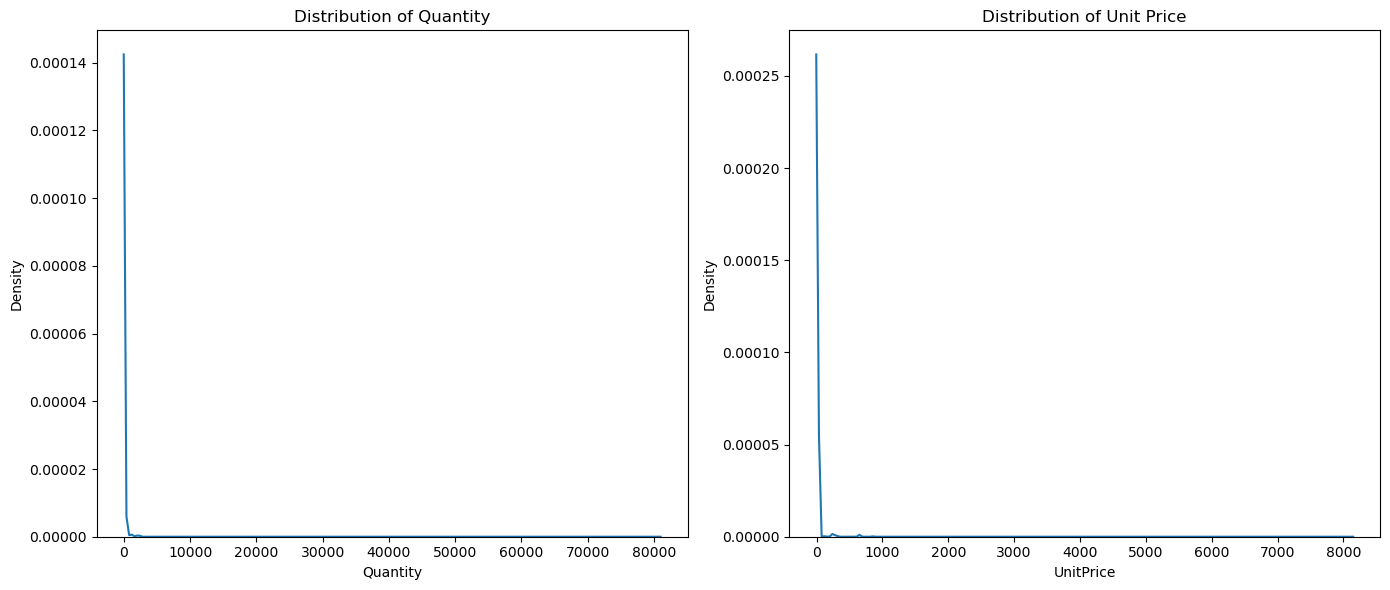

In [50]:
positive_quantity = df_filtered['Quantity'] > 0
positive_unitprice = df_filtered['UnitPrice'] > 0

df_filtered = df_filtered[positive_quantity & positive_unitprice]

fig, axes = plt.subplots(1,2, figsize=(14,6))

sns.kdeplot(data=df_filtered, x='Quantity', ax=axes[0])
axes[0].set_title('Distribution of Quantity')

sns.kdeplot(data=df_filtered, x='UnitPrice', ax=axes[1])
axes[1].set_title('Distribution of Unit Price')

plt.tight_layout()

In [51]:
# The factor determines how many points to clip (the higher the value, the less points to clip and vise versa)
factor = 2.5

def calculate_limits(series, factor):
    q1 = np.quantile(series, 0.25)
    q3 = np.quantile(series, 0.75)
    iqr = q3 - q1
    lower_limit = q1 - iqr * factor
    upper_limit = q3 + iqr * factor
    return lower_limit, upper_limit

# Calculate limits for Quantity
lower_limit_quantity, upper_limit_quantity = calculate_limits(df_filtered['Quantity'], factor)

# Calculate limits for UnitPrice
lower_limit_unitprice, upper_limit_unitprice = calculate_limits(df_filtered['UnitPrice'], factor)

# Filter and remove outliers
df_filtered = df_filtered[
    (df_filtered['Quantity'] > lower_limit_quantity) &
    (df_filtered['Quantity'] < upper_limit_quantity) &
    (df_filtered['UnitPrice'] > lower_limit_unitprice) &
    (df_filtered['UnitPrice'] < upper_limit_unitprice)]

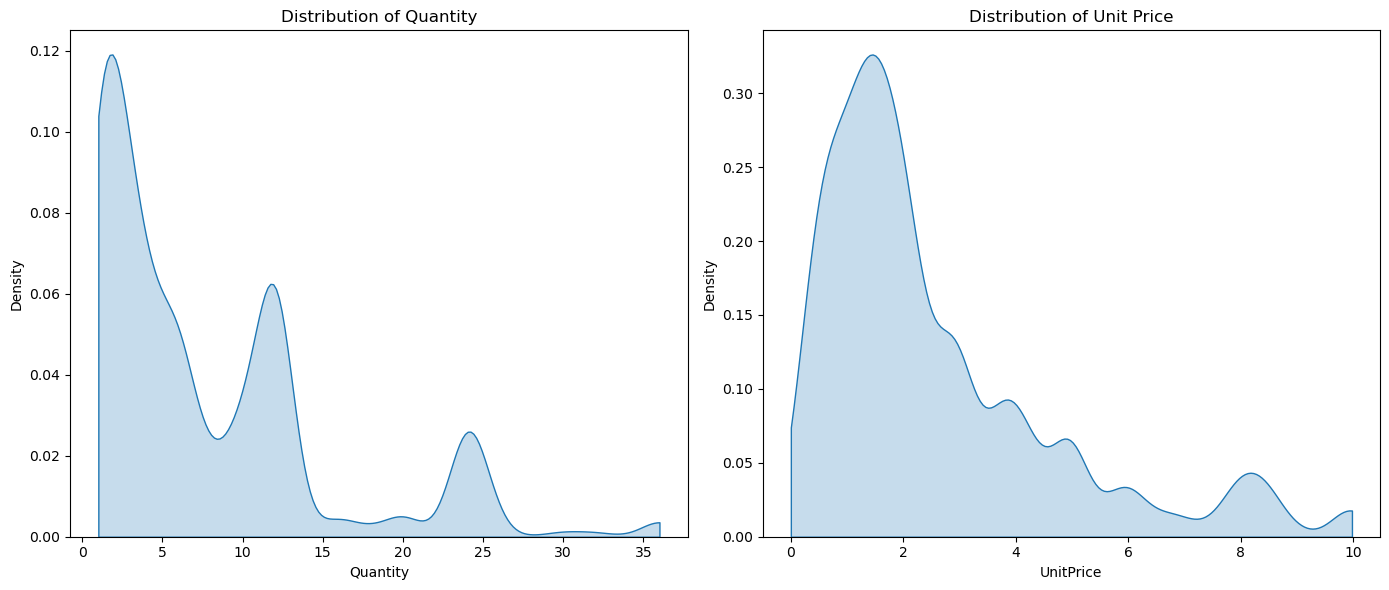

In [52]:
# Show distributions after removing outliers
fig, axes = plt.subplots(1,2, figsize=(14,6))

sns.kdeplot(data=df_filtered, x='Quantity', ax=axes[0], fill=True, cut=0, bw_adjust=2)
axes[0].set_title('Distribution of Quantity')

sns.kdeplot(data=df_filtered, x='UnitPrice', ax=axes[1], fill=True, cut=0, bw_adjust=2)
axes[1].set_title('Distribution of Unit Price')

plt.tight_layout()

In [53]:
#invoice month column

In [56]:
# The function below will extract the month for each invoice. Our focus here is on the month. Thus, we are setting the day to 1
import datetime as dt

def extract_month(x):
    return dt.datetime(x.year, x.month, 1)

df_filtered['InvoiceMonth'] = df_filtered['InvoiceDate'].apply(extract_month)
df_filtered.sample(5)

,InvoiceDate,CustomerID,Quantity,UnitPrice,InvoiceMonth
213059,2011-06-05 10:58:00,14891.0,10,2.08,2011-06-01
484211,2011-11-20 13:33:00,16905.0,10,1.25,2011-11-01
245643,2011-06-30 16:43:00,13745.0,12,0.38,2011-06-01
523492,2011-12-04 13:59:00,14456.0,1,1.25,2011-12-01
126486,2011-03-20 15:02:00,15408.0,2,7.95,2011-03-01


In [57]:
# CohortMonth is the month which the customer made his/her first purchase. Hence, we will group by CustomerID and assign the minimum InvoiceMonth for each customer.
df_filtered['CohortMonth'] = df_filtered.groupby("CustomerID")["InvoiceMonth"].transform("min")
df_filtered.sample(5)

,InvoiceDate,CustomerID,Quantity,UnitPrice,InvoiceMonth,CohortMonth
468821,2011-11-15 13:07:00,14640.0,3,4.95,2011-11-01,2011-04-01
284281,2011-07-31 11:26:00,16813.0,5,0.39,2011-07-01,2011-05-01
26365,2010-12-12 13:37:00,14413.0,2,4.25,2010-12-01,2010-12-01
273330,2011-07-21 11:23:00,17935.0,6,3.35,2011-07-01,2011-07-01
131775,2011-03-24 11:43:00,15144.0,10,1.65,2011-03-01,2011-01-01


In [58]:
# Extract both year and month from both InvoiceMonth and CohortMonth.
def extract_year_month(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month
invoice_year, invoice_month = extract_year_month(df_filtered, 'InvoiceMonth')
cohort_year, cohort_month = extract_year_month(df_filtered, 'CohortMonth')

# Calculate the time difference between InvoiceMonth and CohortMonth
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

# We add 1 for easier interpretability. To illustrate, a CohortIndex of 1 means both InvoiceMonth and CohortMonth are equal.
df_filtered['CohortIndex'] = years_diff * 12 + months_diff
df_filtered.sample(5)

,InvoiceDate,CustomerID,Quantity,UnitPrice,InvoiceMonth,CohortMonth,CohortIndex
199797,2011-05-22 13:51:00,15555.0,3,1.65,2011-05-01,2010-12-01,5
455586,2011-11-10 13:41:00,15184.0,2,0.83,2011-11-01,2011-06-01,5
325499,2011-09-04 14:22:00,12567.0,12,1.65,2011-09-01,2010-12-01,9
180789,2011-05-09 12:16:00,18219.0,2,6.35,2011-05-01,2010-12-01,5
204969,2011-05-25 17:31:00,14584.0,5,1.65,2011-05-01,2011-05-01,0


In [59]:
df_filtered['TotalPrice'] = df_filtered['Quantity'] * df_filtered['UnitPrice']
df_filtered.sample(5)

,InvoiceDate,CustomerID,Quantity,UnitPrice,InvoiceMonth,CohortMonth,CohortIndex,TotalPrice
139424,2011-03-30 12:34:00,16019.0,12,1.65,2011-03-01,2010-12-01,3,19.80
126416,2011-03-20 14:35:00,15288.0,10,1.25,2011-03-01,2010-12-01,3,12.50
417952,2011-10-25 13:46:00,17596.0,1,3.25,2011-10-01,2010-12-01,10,3.25
393236,2011-10-12 12:47:00,17841.0,1,2.08,2011-10-01,2010-12-01,10,2.08
121240,2011-03-16 12:43:00,14543.0,4,4.25,2011-03-01,2010-12-01,3,17.00


In [60]:
# First, we will group by CohortMonth and CohortIndex. We will use this grouping for the three different metrics of interest.
time_cohorts_groups = df_filtered.groupby(['CohortMonth', 'CohortIndex'])

In [61]:
time_cohorts_retention = time_cohorts_groups['CustomerID'].apply(pd.Series.nunique).reset_index()
time_cohorts_retention_pivot = time_cohorts_retention.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')


CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,847.0,305.0,267.0,312.0,300.0,336.0,304.0,287.0,291.0,324.0,312.0,426.0,218.0
2011-01-01,402.0,86.0,106.0,90.0,126.0,115.0,100.0,98.0,122.0,131.0,145.0,47.0,NaN
2011-02-01,363.0,65.0,69.0,101.0,98.0,88.0,91.0,96.0,91.0,112.0,23.0,NaN,NaN
2011-03-01,446.0,65.0,110.0,89.0,100.0,75.0,117.0,105.0,121.0,38.0,NaN,NaN,NaN
2011-04-01,289.0,60.0,59.0,58.0,55.0,68.0,65.0,72.0,21.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,54.0,48.0,47.0,59.0,63.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,232.0,39.0,34.0,62.0,54.0,76.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,192.0,32.0,42.0,44.0,52.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,166.0,31.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
cohort_sizes = time_cohorts_retention_pivot.iloc[:,0]
time_cohorts_retention_rate_pivot = time_cohorts_retention_pivot.divide(cohort_sizes, axis=0).round(3)


CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.360,0.315,0.368,0.354,0.397,0.359,0.339,0.344,0.383,0.368,0.503,0.257
2011-01-01,1.0,0.214,0.264,0.224,0.313,0.286,0.249,0.244,0.303,0.326,0.361,0.117,NaN
2011-02-01,1.0,0.179,0.190,0.278,0.270,0.242,0.251,0.264,0.251,0.309,0.063,NaN,NaN
2011-03-01,1.0,0.146,0.247,0.200,0.224,0.168,0.262,0.235,0.271,0.085,NaN,NaN,NaN
2011-04-01,1.0,0.208,0.204,0.201,0.190,0.235,0.225,0.249,0.073,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.194,0.172,0.168,0.211,0.226,0.269,0.097,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.168,0.147,0.267,0.233,0.328,0.099,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.167,0.219,0.229,0.271,0.120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.187,0.253,0.253,0.139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
time_cohorts_avg_quantity = time_cohorts_groups['Quantity'].mean().round(1).reset_index()
time_cohorts_avg_quantity_pivot = time_cohorts_avg_quantity.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')


CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,7.1,8.4,7.6,7.6,7.7,7.5,7.4,8.0,7.8,8.3,8.0,7.2,8.1
2011-01-01,7.4,6.5,6.4,7.0,8.0,8.4,8.6,8.3,8.3,7.3,6.9,7.2,NaN
2011-02-01,8.1,7.5,7.7,8.5,8.8,8.4,9.6,9.8,7.7,8.9,9.0,NaN,NaN
2011-03-01,7.8,8.1,8.5,8.1,9.2,9.6,9.9,8.1,7.5,6.6,NaN,NaN,NaN
2011-04-01,8.1,8.2,7.6,9.5,8.5,7.6,8.0,7.5,7.1,NaN,NaN,NaN,NaN
2011-05-01,8.2,7.2,9.2,10.1,10.1,7.5,8.5,6.7,NaN,NaN,NaN,NaN,NaN
2011-06-01,7.6,7.9,8.1,9.2,7.8,7.3,6.8,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,7.4,9.9,6.7,6.9,5.5,6.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,8.6,4.9,4.9,5.4,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
time_cohorts_avg_total_price = time_cohorts_groups['TotalPrice'].mean().round(2).reset_index()
time_cohorts_avg_total_price_pivot = time_cohorts_avg_total_price.pivot(index='CohortMonth', columns='CohortIndex', values='TotalPrice')


CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,14.52,15.78,14.97,14.34,13.88,14.89,13.94,13.79,14.05,15.81,15.39,13.80,15.08
2011-01-01,13.73,13.70,12.14,13.22,15.49,16.05,17.51,14.45,14.32,14.47,13.33,12.34,NaN
2011-02-01,14.73,13.86,13.41,15.88,15.28,13.60,17.23,18.17,14.66,17.17,17.71,NaN,NaN
2011-03-01,14.29,15.82,16.95,14.49,16.01,16.27,17.74,14.61,12.85,10.45,NaN,NaN,NaN
2011-04-01,14.02,16.49,14.67,15.34,14.52,13.22,13.64,13.67,11.32,NaN,NaN,NaN,NaN
2011-05-01,15.20,13.51,15.94,16.85,17.06,12.28,14.69,12.63,NaN,NaN,NaN,NaN,NaN
2011-06-01,13.08,10.52,14.91,15.62,12.27,12.34,10.49,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,12.12,18.90,11.25,12.51,9.97,11.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,14.01,9.87,10.06,11.91,13.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# Format the index to show only the date part
time_cohorts_retention_rate_pivot.index = time_cohorts_retention_rate_pivot.index.strftime('%Y-%m-%d')
time_cohorts_avg_quantity_pivot.index = time_cohorts_avg_quantity_pivot.index.strftime('%Y-%m-%d')
time_cohorts_avg_total_price_pivot.index = time_cohorts_avg_total_price_pivot.index.strftime('%Y-%m-%d')

AttributeError: 'Index' object has no attribute 'strftime'

In [68]:
#retention rates

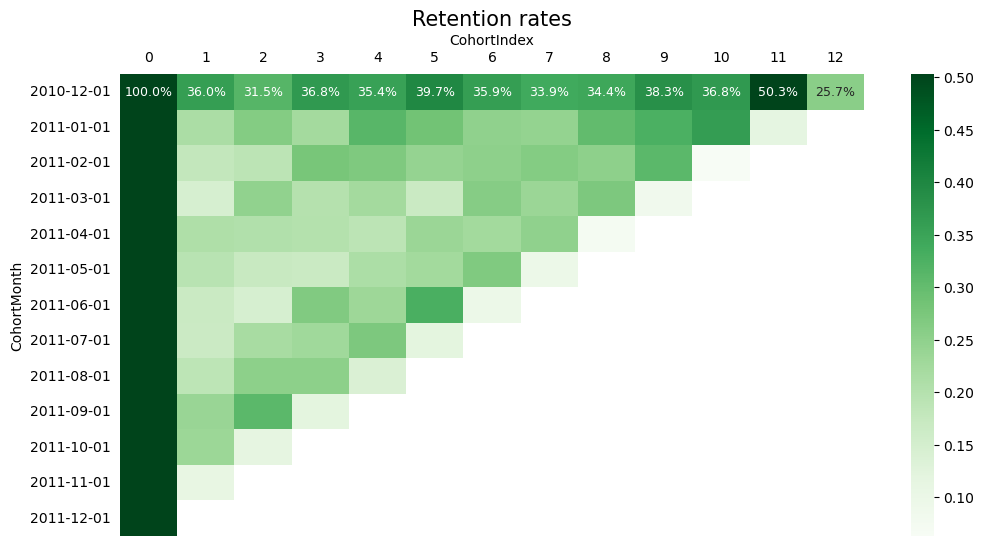

In [67]:
plt.figure(figsize=(12, 6))
plt.title("Retention rates", fontsize=15)

# For better visibility, we will assign vmin and vmax to the pivot table min and max values. (we will exclude the first column since it distorts the color distribution)
ax = sns.heatmap(data=time_cohorts_retention_rate_pivot,
                 annot=True,
                 fmt='.1%',
                 vmin=time_cohorts_retention_rate_pivot.min().min(),
                 vmax=time_cohorts_retention_rate_pivot.iloc[:,1:].max().max(),
                 cmap='Greens',
                 annot_kws={"size": 9})

# Move lower ticks and title to top and remove tick markers.
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(left=False, top=False)

retention_rates_plot = plt.gcf()

plt.show()

In [69]:
#Avg

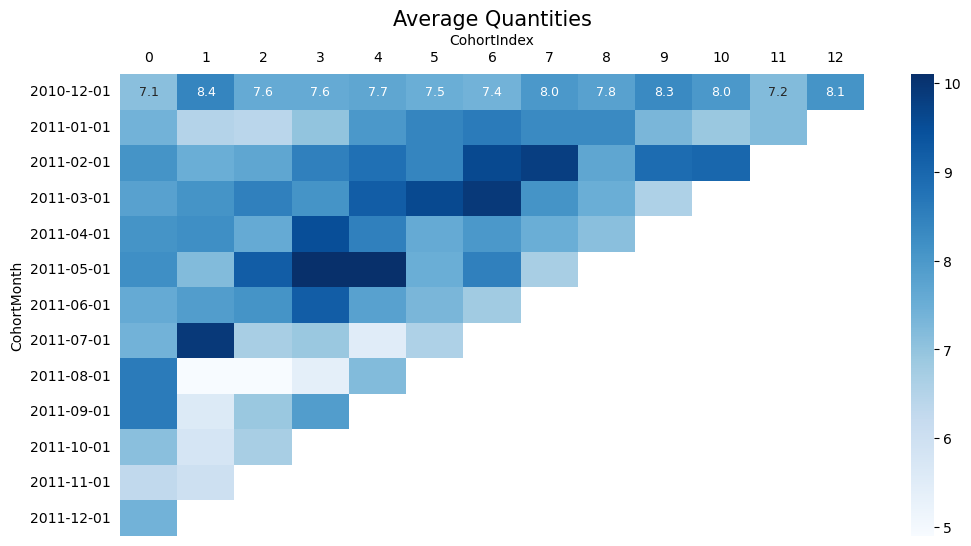

In [70]:
plt.figure(figsize=(12, 6))
plt.title("Average Quantities", fontsize=15)

ax = sns.heatmap(data=time_cohorts_avg_quantity_pivot,
                 annot=True,
                 fmt='.1f',
                 vmin=time_cohorts_avg_quantity_pivot.min().min(),
                 vmax=time_cohorts_avg_quantity_pivot.max().max(),
                 cmap='Blues',
                 annot_kws={"size": 9})

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(left=False, top=False)

average_quantities_plot = plt.gcf()

plt.show()

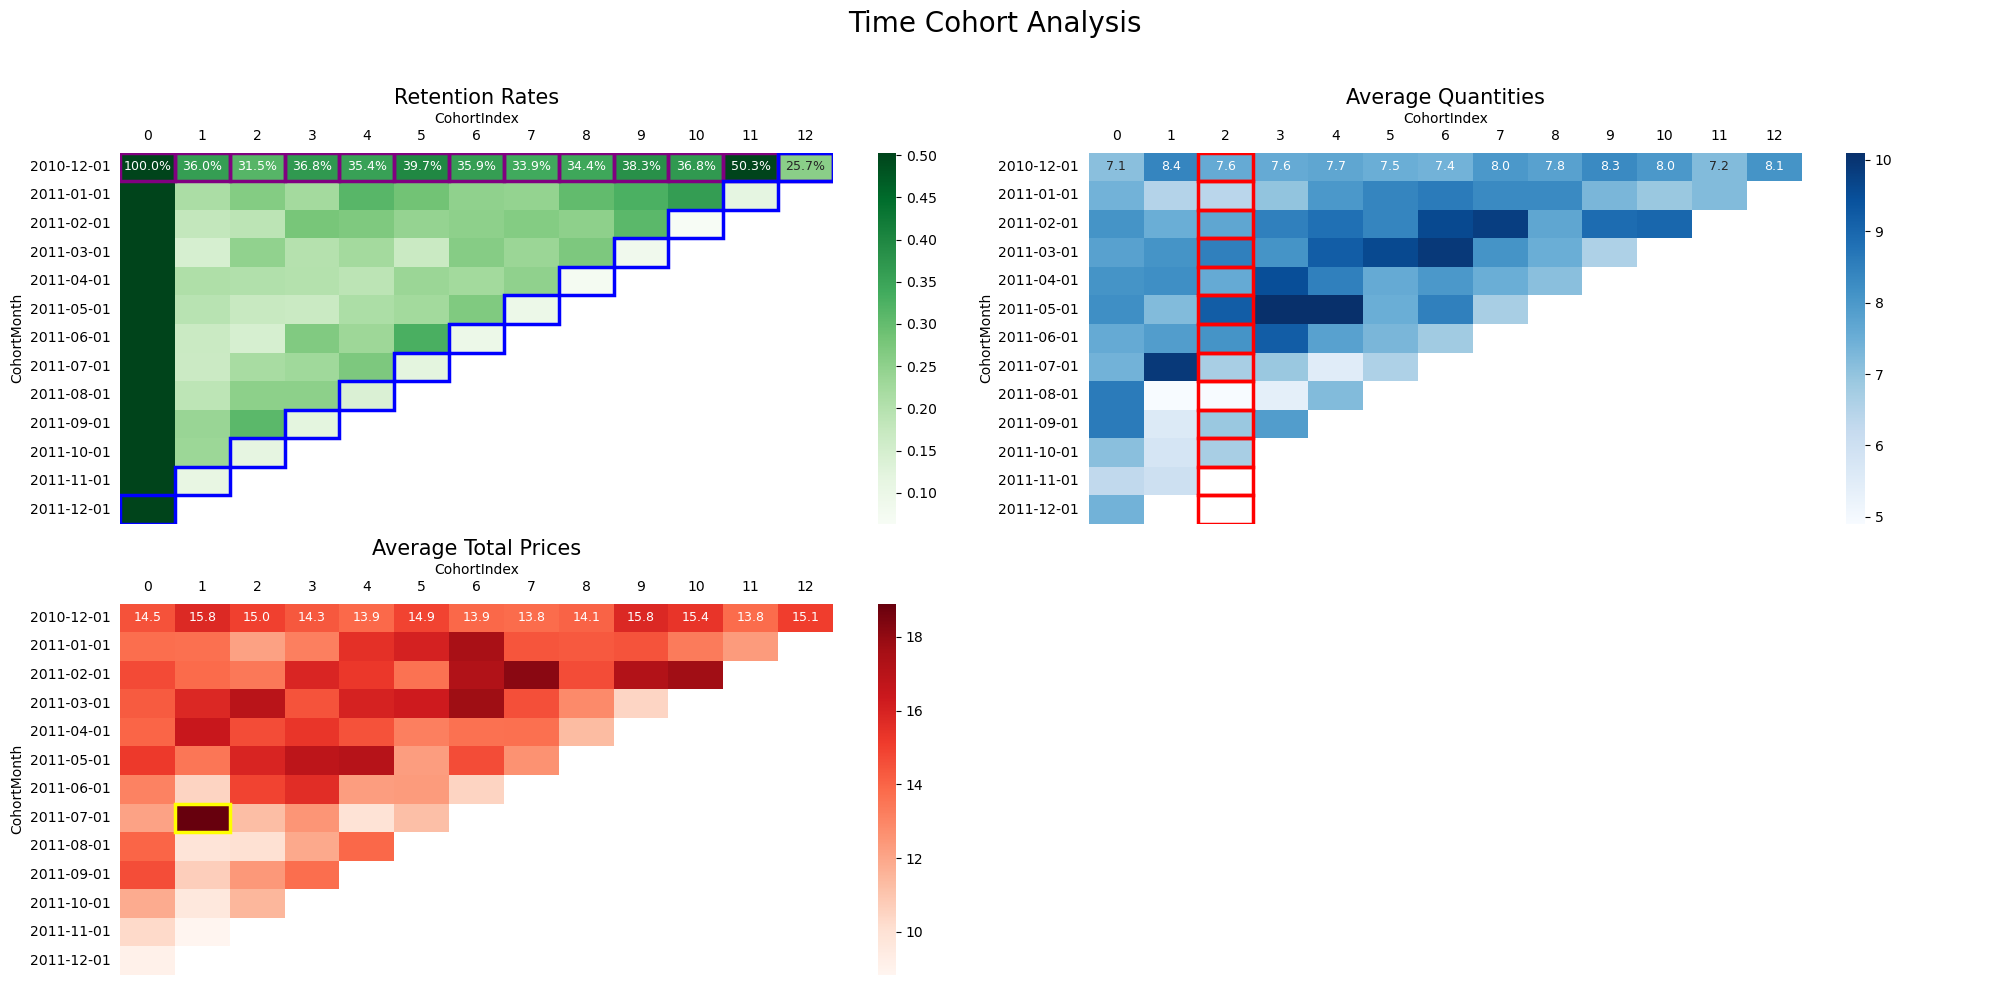

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle("Time Cohort Analysis", fontsize=20)

# Plot 1: Retention Rates
sns.heatmap(data=time_cohorts_retention_rate_pivot,
            annot=True,
            fmt='.1%',
            vmin=time_cohorts_retention_rate_pivot.min().min(),
            vmax=time_cohorts_retention_rate_pivot.iloc[:,1:].max().max(),
            cmap='Greens',
            annot_kws={"size": 9},
            ax=axes[0, 0])
axes[0, 0].set_title("Retention Rates", fontsize=15)
axes[0, 0].xaxis.tick_top()
axes[0, 0].xaxis.set_label_position('top')
axes[0, 0].tick_params(left=False, top=False)

# Plot 2: Average Quantities
sns.heatmap(data=time_cohorts_avg_quantity_pivot,
            annot=True,
            fmt='.1f',
            vmin=time_cohorts_avg_quantity_pivot.min().min(),
            vmax=time_cohorts_avg_quantity_pivot.max().max(),
            cmap='Blues',
            annot_kws={"size": 9},
            ax=axes[0, 1])
axes[0, 1].set_title("Average Quantities", fontsize=15)
axes[0, 1].xaxis.tick_top()
axes[0, 1].xaxis.set_label_position('top')
axes[0, 1].tick_params(left=False, top=False)

# Plot 3: Average Total Prices
sns.heatmap(data=time_cohorts_avg_total_price_pivot,
            annot=True,
            fmt='.1f',
            vmin=time_cohorts_avg_total_price_pivot.min().min(),
            vmax=time_cohorts_avg_total_price_pivot.max().max(),
            cmap='Reds',
            annot_kws={"size": 9},
            ax=axes[1, 0])
axes[1, 0].set_title("Average Total Prices", fontsize=15)
axes[1, 0].xaxis.tick_top()
axes[1, 0].xaxis.set_label_position('top')
axes[1, 0].tick_params(left=False, top=False)

# Hide the unused subplot
axes[1, 1].axis('off')

# Function to add border to specific cells
def highlight_cells(ax, cell_coords, color='yellow', linewidth=2.5):
    for (x, y) in cell_coords:
        rect = plt.Rectangle((x, y), 1, 1, fill=False, edgecolor=color, linewidth=linewidth)
        ax.add_patch(rect)

# Highlight a row in the retention rate heatmap
row_y = 0
row_to_highlight = [(x, row_y) for x in range(time_cohorts_retention_rate_pivot.shape[1])]
highlight_cells(axes[0, 0], row_to_highlight, color='purple')

# Highlight a column in the average quantities heatmap
column_x = 2
column_to_highlight = [(column_x, y) for y in range(time_cohorts_avg_quantity_pivot.shape[0])]
highlight_cells(axes[0, 1], column_to_highlight, color='red')

# Highlight a cell in the average total price heatmap
cell_to_highlight = [(1, 7)]
highlight_cells(axes[1, 0], cell_to_highlight)

# Highlight a diagonal in the retention rate heatmap
start_x, start_y = 0, time_cohorts_retention_rate_pivot.shape[0] - 1
diagonal_length = min(time_cohorts_retention_rate_pivot.shape[0], time_cohorts_retention_rate_pivot.shape[1])
diagonal_to_highlight = [(start_x + i, start_y - i) for i in range(diagonal_length)]
highlight_cells(axes[0, 0], diagonal_to_highlight, color='blue')

# Adjust layout to make room for the super title
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save to PDF
with PdfPages('time_cohort_analysis.pdf') as pdf:
    pdf.savefig(fig)

plt.show()
